# Introduction to ArcGIS Hub - Basic features

ArcGIS Hub is a cloud-based engagement platform that enables organizations to communicate more effectively with their communities. ArcGIS Hub Basic is available with all ArcGIS Online subscriptions. Using Hub Basic, you can create unlimited websites and pages using the site editor and build a catalog of searchable content for each of your sites using the site's content library. Click [here](https://www.esri.com/en-us/arcgis/products/arcgis-hub/resources) to learn more about ArcGIS Hub.

>_Note:_ The pattern to add, search, get, update and delete `Sites` and `Pages` is identical to that of [Initiatives](../hub-for-guide-premium) as demonstrated here. 

In this notebook, we will take a look at examples of how to
* Create a site and pages
* Clone a site within the same (Hub Basic) org, ArcGIS Enterprise orgs, and ArcGIS Hub Premium orgs
* Link and unlink pages

In [1]:
from arcgis.gis import GIS

First, we will sign-in to an organization with Hub Basic capabilities for the purpose of demonstrating these workflows.

> _Note:_ In order to replicate these workflows, you will have to sign-in using your own credentials for your ArcGIS organization. This notebook is only designed for demonstration purposes. You may also want to verify the features available to you, per your ArcGIS Hub licensing.

If you are looking for examples for working with Initiatives and Events we have this [ArcGIS Hub Premium](../hub-premium-guide) guide. We also have a guide that uses [Enterprise Sites](../enterprise-sites-guide) to demonstrate site and page layouts and theme editing. 

Here are examples that demonstrate adding _sites_, _pages_ and cloning sites using ArcGIS Hub Basic.

In [2]:
gis1 = GIS(profile="your_online_hub_basic_profile")

We will now connect to the Hub associated with this Web GIS.

In [3]:
hub_basic = gis1.hub

### Adding new sites and pages

ArcGIS Hub allows you to build configurable and branded websites for sharing internal and public content, such as apps, data, and media. You can build a Hub Basic Site using the ArcGIS API for Python as follows:

In [4]:
site1 = hub_basic.sites.add('Python Site')
site1.item

<Item title:"Python Site" type:Hub Site Application owner:creator1>

Creating a Hub Basic Site creates a Site item and the Content Team group for that site, where you can add the items for your site's Content Library. Users with Administrative privileges that create a site will also have a Core Team group created as part of the site, to allow collaboration among members of that team.

You can attach web pages to your site to separate topics and to expand your site's navigation. 

In [5]:
page1 = site1.pages.add('Python First Page')
page1.item

<Item title:"Python First Page" type:Hub Page owner:creator1>

You can also view all pages of a site.

In [6]:
site1.pages.search()

[<Page title:"Python First Page" owner:creator1>]

### Cloning the site in the same organization

Cloning the site in the same organization replicates the layout of the site in its copy.

In [7]:
site1_clone = hub_basic.sites.clone(site1, pages=True)
site1_clone.item

<Item title:"Python Site-copy-1691085172864" type:Hub Site Application owner:creator1>

### Cloning the site in an ArcGIS Enterprise organization

A feature exclusive to the Python API version of ArcGIS Hub, is the ability to clone sites and initiatives between ArcGIS Online and ArcGIS Enterprise Organizations.

Once we sign into our ArcGIS Enterprise target organization, we will be able to clone this site there, allowing us to use the same layout of this site without having to re-create and re-configure it in another organization.

>_Note:_ This workflow is for demonstration purposes only. To replicate this, you may have to sign-in to an ArcGIS Enterprise organization you have access to.


In [8]:
gis_portal = GIS(profile='your_enterprise_profile')

We can work with Enterprise Sites using the `sites` property of the `GIS` object. 

We will now clone our site from the Hub Basic organization to the Enterprise organization in the same way we cloned it previously.

In [9]:
site_portal = gis_portal.sites.clone(site1, pages=True)
site_portal.item

<Item title:"Python Site-copy-1691085190829" type:Site Application owner:creator1>

Similar to Hub Basic Sites, Enterprise Sites also come with a Site item and the Content Team group for that site, where you can add the items for your site's Content Library. Users with Administrative privileges that create a site will also have a Core Team group created as part of the site, to allow collaboration among members of that team.

In [10]:
site_portal.pages.search()

[<Page title:"Python First Page-copy-1691085195043" owner:creator1>]

As we see above, the page and site were cloned successfully.

### Cloning the site in an ArcGIS Premium organization

We will now sign into an organization with Hub Premium enabled and will connect to the Hub associated with it.

In [11]:
gis2 = GIS(profile="your_online_hub_premium_profile")

In [12]:
hub_premium = gis2.hub

We will use the same `clone` method on the target organization to clone this site. However, for a Hub Premium organization, your `clone` renders an `initiative` with the site included.

In [13]:
initiative_clone = hub_premium.sites.clone(site1, pages=True)
initiative_clone.item

<Item title:"Python Site-copy-1691085203041" type:Hub Initiative owner:creator1>

If you notice above, cloning a site in a Hub Premium environment gave us a Hub Initiative. A Hub Initiative comes with an Initiative item and a Site item. You also get a Content Team group created to manage the content in your initiative's content library and a Followers Team group that maintains a list of the followers of the initiative. Users with Administrative privileges that create an initiative will also have a Core Team group created as part of the initiative, to allow collaboration among members of that team.

We will now fetch the site for this initiative.

In [14]:
site_premium = hub_premium.sites.get(initiative_clone.site_id)
site_premium

<Site title:"Python Site-copy-1691085203041" owner:creator1>

In [15]:
site_premium.pages.search()

[<Page title:"Python First Page-copy-1691085212588" owner:creator1>]

We can see that the page was cloned successfully.

Next, we will fetch a page from another site and link it to this site. Page linking can be useful when you have certain pages in the same organization that are applicable to multiple sites (e.g., F.A.Q. pages, Contact Information pages, etc.) but you do not want to recreate multiple copies of those pages. 

<Item title:"page space" type:Hub Page owner:creator1>
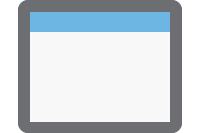

In [16]:
new_page = hub_premium.pages.get('1c75da020b2f4943a3f657ef59fc1bc8')
new_page.item

In [17]:
site_premium.pages.link(new_page, slug='linked Second Page')
site_premium.pages.search()

[<Page title:"Python First Page-copy-1691085212588" owner:creator1>,
 <Page title:"page space" owner:creator1>]

We can also unlink pages from sites:

In [18]:
site_premium.pages.unlink(new_page)
site_premium.pages.search()

[<Page title:"Python First Page-copy-1691085212588" owner:creator1>]

The page was unlinked from this site, without being deleted.

### Deleting our sites and initiative

We will now delete the sites and initiative we created. Deleting a site or initiative not only deletes the items but also the groups created initially. If a site has a page that is not linked to any other site, deleting the site also deletes the page.

In [19]:
site1.delete()

True

In [21]:
site1_clone.delete()

True

In [22]:
site_portal.delete()

True

In [23]:
initiative_clone.delete()

True